# Lotka-Volterra's prey-predator model

<img src="PreyPredator.jpg" alt="PreyPredator.jpg" style="width: 600px;"/>

# Reaction model compared with influence model
* reaction network: differential, stochastic and boolean semantics
* influence network: differential, stochastic and boolean semantics

F. Fages, May 2020

# 1. Reaction model (CRN)
Example of Lotka-Volterra prey-predator mathematical model written with enzymatic reactions with mass action law kinetics
* the prey species A reproduces by autosynthesis, and is degraded by B
* the predator species B reproduces by autocatalysis of A, and degrades 

In [1]:
present(A,a). present(B,b).

In [2]:
MA(k1) for A+B => 2*B.

In [3]:
MA(k2) for A => 2*A.

In [4]:
MA(k3) for B => _.

In [5]:
parameter(a=1, b=1, k1=2, k2=2, k3=1).

In [6]:
list_model.

MA(k1) for A+B=>2*B.
MA(k2) for A=>2*A.
MA(k3) for B=>_.
present(A,a).
present(B,b).
parameter(
  a = 1,
  b = 1,
  k1 = 2,
  k2 = 2,
  k3 = 1
).


### Graphical views
* directed hypergraph of reactions (bipartite graph of species and reactions)
* labelled directed graph of influences (abstraction of positive and negative influences between species)

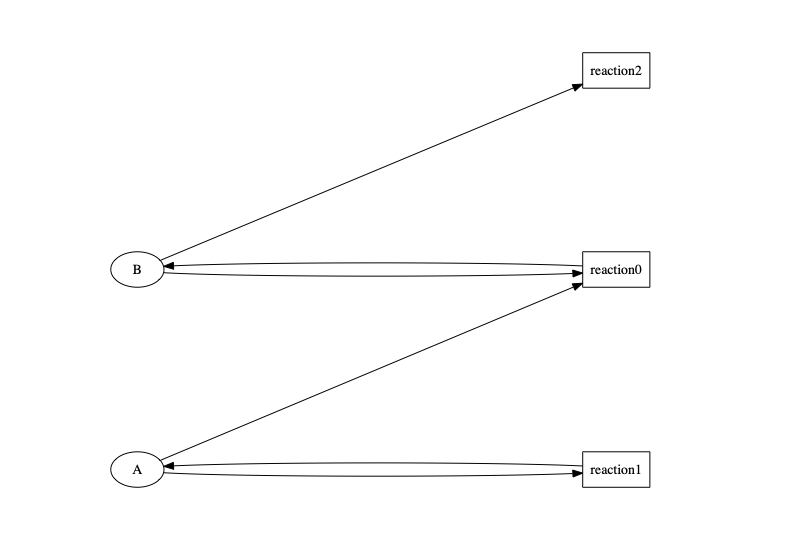

In [7]:
draw_reactions.

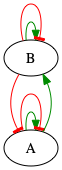

In [8]:
draw_influences.

## Sustained oscillations in the differential semantics

In [9]:
list_ode.

In [10]:
search_conservations.

No complex invariant found


In [11]:
numerical_simulation. plot.

In [12]:
plot(show:B, against:A).

In [13]:
%slider k1 k2 k3 a b

Box(children=(SelectionSlider(continuous_update=False, description='k1', index=10, layout=Layout(min_width='30…

## Almost sure extinction in the stochastic semantics
* With this parameter set, the prey and predator extinct almost surely
* The intuitive explanation is that low concentrations become almost surely 0 at some time point in the stochastic simulation.

In [14]:
option(method:ssa). seed(0). numerical_simulation. plot.

In [15]:
plot(show:B, against:A).

In [16]:
%slider k1 k2 k3 a b

Box(children=(SelectionSlider(continuous_update=False, description='k1', index=10, layout=Layout(min_width='30…

## Extinction and no oscillation in the Boolean semantics
* reason just on the presence or absence of molecular species
* asynchronous Boolean transition system ignoring reaction rates
* SAT algorithm for enumerating all stable states, here: 
 * either both A, B absent is a stable state
 * or B absent A present
 * yet both A and B present is not stable since A and B may disappear in this case

* Computation Tree Logic (CTL) symbolic model-checking algorithm for enumerating possible qualitative behaviors of interest, here:
 * both A and B may extinguish
 * species A may survive with no possibility of disappearing (reachability of stable state A present)
 * B may survive but with always the possibility of disappearing (reachability of non stable steady state B present)
 * no Boolean oscillation possible (0 is stable)
 * checkpoints are possibly non causal phenomenological properties

In [17]:
list_stable_states.

present({}).
present({A}).


In [18]:
generate_ctl_not.

reachable(stable(A))
reachable(stable(not A))
reachable(stable(not B))
reachable(steady(B))
checkpoint2(B,not A)
checkpoint2(A,not B)


# 2. Influence model
* positive and negative influences with forces (mass action law)
* prey-predator reaction rewritten with 2 influences with same force

In [19]:
clear_model.

In [20]:
present(C,c). present(D,d).

In [21]:
parameter(c=1, d=1, k1=2, k2=2, k3=1).
parameter(a=1, b=1).

In [22]:
MA(k1) for C,D -< C.

In [23]:
MA(k1) for C,D -> D.

In [24]:
MA(k2) for C -> C.

In [25]:
MA(k3) for D -< D.

In [26]:
list_model.

MA(k1) for C,D -< C.
MA(k1) for C,D -> D.
MA(k2) for C -> C.
MA(k3) for D -< D.
present(C,c).
present(D,d).
parameter(
  c = 1,
  d = 1,
  k1 = 2,
  k2 = 2,
  k3 = 1,
  a = 1,
  b = 1
).


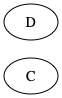

In [27]:
draw_reactions.

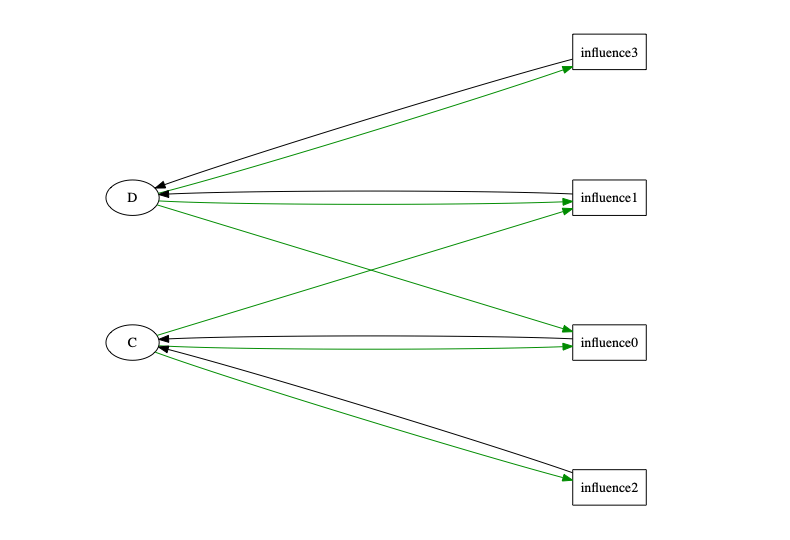

In [28]:
draw_influence_hypergraph.

In [29]:
draw_influences.

## Same differential semantics

In [30]:
list_ode.

In [31]:
numerical_simulation(method:bsimp). plot.

In [32]:
plot(show:D, against:C).

## Stochastic semantics
* desynchronisation of consumption and production
* extinctions but on a much longer term (or with lower stochastic conversion factor for lower numbers of species)

In [33]:
numerical_simulation(method:ssa). plot.

In [34]:
plot(show:D, against:C).

## Same Boolean semantics in this example

In [35]:
generate_ctl_not.

reachable(stable(C))
reachable(stable(not C))
reachable(stable(not D))
reachable(steady(D))
checkpoint2(D,not C)
checkpoint2(C,not D)


In [36]:
list_stable_states.

present({}).
present({C}).
